In [1]:
%matplotlib inline
import mpld3
#mpld3.enable_notebook()

import matplotlib.pyplot as plt
import numpy as np

from transitfit.utils import t_folded, lc_eval
from transitfit import KeplerLightCurve, TransitModel

In [2]:
lc = KeplerLightCurve(1422, [1,2])
model = TransitModel(lc)

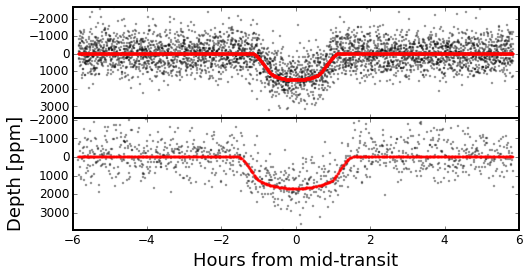

In [3]:
params = lc.archive_params #best-fit params from NExScI archive
model.plot_planets(params);

In [4]:
%timeit f = model.evaluate(params)

10 loops, best of 3: 62.2 ms per loop


In [5]:
#fit = model.fit_leastsq(params, options={'disp':True})

In [6]:
model.fit_emcee(nburn=3, niter=10)

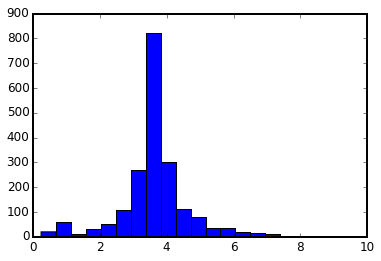

In [7]:
plt.hist(model.sampler.flatchain[:,0], bins=20);

In [22]:
params

[3.66471,
 0.5,
 0.5,
 0,
 5.84164124,
 135.92243,
 0.6529,
 0.037524,
 0,
 0,
 19.85028393,
 133.65016,
 0.7059,
 0.040733,
 0,
 0]